In [ ]:
#Install Pandas (For CI Success) - Already installed Locally
%pip install pandas

In [ ]:
#Install Matplotlib (For CI Success) - Already installed Locally
%pip install matplotlib

In [ ]:
#Install SeaBorn (For CI Success) - Already installed Locally
%pip install seaborn

In [ ]:
#Install NLTK (For CI Success) - Already installed Locally
%pip install nltk

In [ ]:
#Install sklearn (For CI Success) - Already installed Locally
%pip install sklearn

In [ ]:
#Install seaborn (For CI Success) - Already installed Locally
%pip install seaborn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
import sklearn
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df = pd.read_csv('../googleplaystore_user_reviews.csv', encoding='latin1')

In [35]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:
#We are only interested in the Translated_Review and Sentiment Column
df = pd.concat([df.Translated_Review,df.Sentiment], axis = 1)
df.dropna(axis = 0, inplace = True) #drop nan
df.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


Text(0.5, 1.0, 'Count of Sentiments')

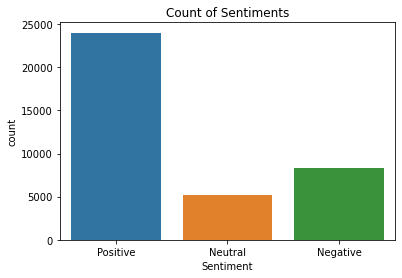

In [37]:
#Visualizing our Sentiment Data
sns.countplot(df.Sentiment)
plt.title('Count of Sentiments')

In [38]:
#Import stopwords list to remove them from the Reviews
from nltk.corpus import stopwords 

#Now we Pre Process all the customer reviews
processed_list = []
for i in df.Translated_Review:
    text = re.sub("[^a-zA-Z]", " ", i)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    processed_list.append(text)

In [39]:
processed_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [40]:
#Import CountVectorizer from Sklearn
from sklearn.feature_extraction.text import CountVectorizer
#Now we will create a bag of words using the CountVectorizer of sklearn

max_features=1000 #We consider the top 1000 features ordered by term frequency across the corpus
count_vectorizer=CountVectorizer(max_features=max_features)
sparce_matrix=count_vectorizer.fit_transform(processed_list).toarray()
bag_of_words=count_vectorizer.get_feature_names()

#print("Most used 50 words: ",bag_of_words[0:50])

In [ ]:
#Classification Using Different Classification Algorithms
y = df.iloc[:,1].values
x = sparce_matrix

In [ ]:
print(x)

In [ ]:
#Now first we have to split our data into two,
#training data set and testing data set for that
#we make use of train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=1)

In [ ]:
#First Classifier: NAIVE BAYES CLASSIFIER
#import guassian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(xtrain, ytrain)
print('Accuracy:', naive_bayes.score(xtest, ytest))

In [ ]:
#confusion matrix for naive bayes classifier

from sklearn.metrics import confusion_matrix

y_predicted=naive_bayes.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
#Second Classifier: RANDOM FOREST CLASSIFIER
#import random forest classfier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 10, random_state = 42)
random_forest.fit(xtrain, ytrain)
print("Accuracy: ", random_forest.score(xtest, ytest))

In [ ]:
#confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted=random_forest.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
#Thir Classifier: Logisitic Regression
#import logistic regression

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain, ytrain)
print("Accuracy: ", logistic_regression.score(xtest, ytest))

In [ ]:
#confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

y_predicted=logistic_regression.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()